# Measuring distance dependent frequency shift
- drive function generator with 970mVpp at different frequencies (1Hz, 0.1Hz)

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dir = r'C:\Users\Characterization\B26_scanning_probe\data\221130_17_10_00_AFM\data' 

In [4]:
files = os.listdir(dir)

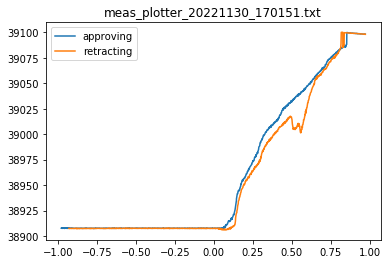

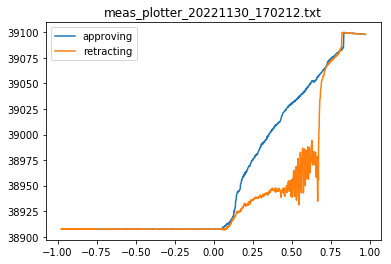

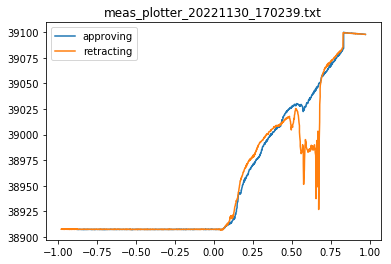

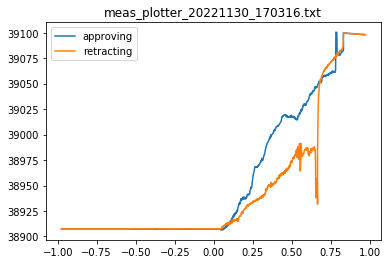

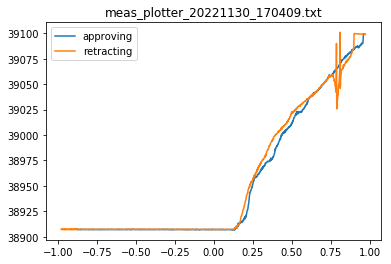

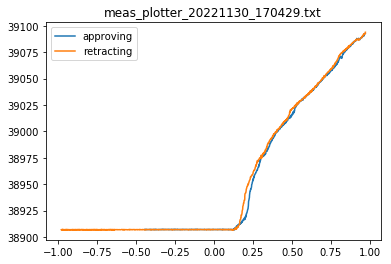

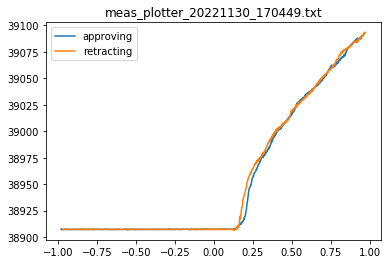

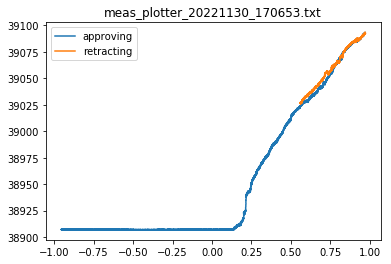

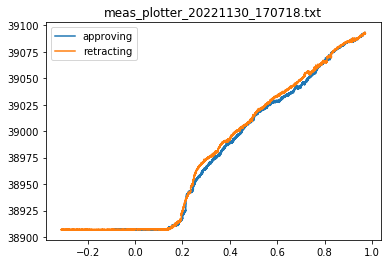

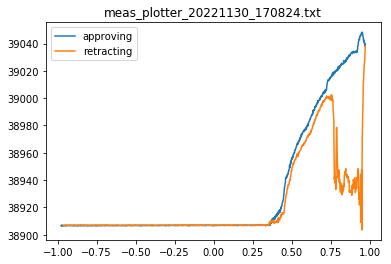

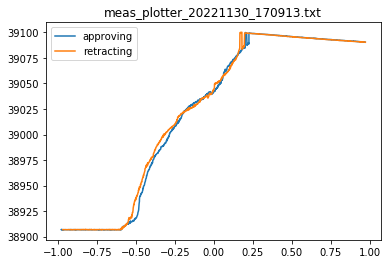

In [72]:
data = {}
for file in files:
    d = np.loadtxt(dir+"/"+file, skiprows=7,delimiter=";")
    #print(np.shape(d))
    # split point where the two arrays are stuck together
    _i = np.where(d[:,0]==0)[0][0]
    #print(_i)
    _d = np.split(d,[_i+1],axis=0)
    pz,df=_d
    # the two arrays have the same length
    #print(np.shape(df))
    #print(np.shape(pz))
    #plt.plot(df[:,0],df[:,1])
    #plt.plot(pz[:,0],pz[:,1])
    #plt.show()
    
    # separate the two directions
    _j = np.argmax(pz[:,1],axis=0)
    df1,df2 = np.split(df,[_j],axis=0)
    pz1,pz2 = np.split(pz,[_j],axis=0)
    plt.plot(pz1[:,1],df1[:,1],label="approving")
    plt.plot(pz2[:,1],df2[:,1],label="retracting")
    plt.legend()
    plt.title(file)
    plt.savefig(r"C:\Users\Characterization\B26_scanning_probe\data\221130_17_10_00_AFM\analysis" +"\\"+str(file[:-4])+".png",dpi=300)
    plt.show()